In [ ]:
pip install cellpose

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 205.0/205.0 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 46.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.5/39.5 MB 12.4 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinu

# New Section

Cell count: 813


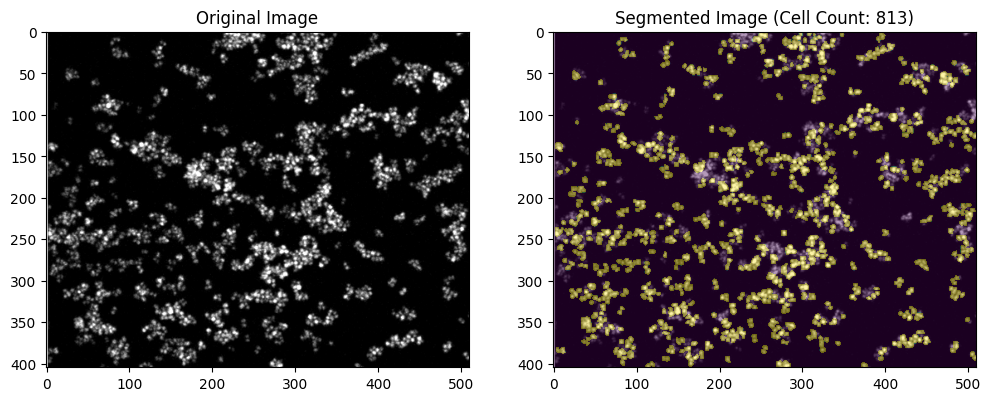

In [3]:
from cellpose import models, io, plot
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = '/content/bacteria-1.png'  # Update this with the correct path to your image
img = io.imread(image_path)

# Initialize the Cellpose model
model = models.Cellpose(gpu=False, model_type='cyto')

flow_threshold=0.4     # A higher threshold will only consider strong flows as cell boundaries, potentially leading to more distinct cell segmentation but risking missing weaker or less defined boundaries.
cellprob_threshold=0   # A higher threshold will result in only confident predictions being considered as cell regions, potentially reducing false positives but also risking missing weaker cell signals.

# Run Cellpose
masks, flows, styles, diams = model.eval([img], diameter=3, channels=[0, 0],flow_threshold=flow_threshold,cellprob_threshold=cellprob_threshold)

# Count cells
cell_count = np.max(masks[0])
print(f'Cell count: {cell_count}')

# Plot the results
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].imshow(img, cmap='gray')
axes[0].set_title('Original Image')
axes[1].imshow(img, cmap='gray')
axes[1].imshow(masks[0], cmap=None, vmin=0, vmax=1, alpha=0.4)
axes[1].set_title(f'Segmented Image (Cell Count: {cell_count})')
plt.show()
